In [27]:
import pandas as pd
import numpy as np

In [28]:
df=pd.read_csv("C:\\Users\\HARSHITA\\Downloads\\cars - cars.csv")
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner
2,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
numerical_col=[]
for col in df.columns:
    if df[col].dtype!='object':
        numerical_col.append(col)
print(numerical_col)


['year', 'selling_price', 'km_driven']


In [31]:
# handling outliers in all columns with the help of capping and loop

In [32]:
df_before=df.copy()

In [33]:
for col in numerical_col:
    percentile25=df[col].quantile(0.25)
    percentile75=df[col].quantile(0.75)

    IQR=percentile75-percentile25

    upper_limit=percentile75+1.5*IQR
    lower_limit=percentile25-1.5*IQR

    df[col]=np.where(df[col]>upper_limit,upper_limit,
                                np.where(df[col]<lower_limit,lower_limit
                                         ,df[col]))


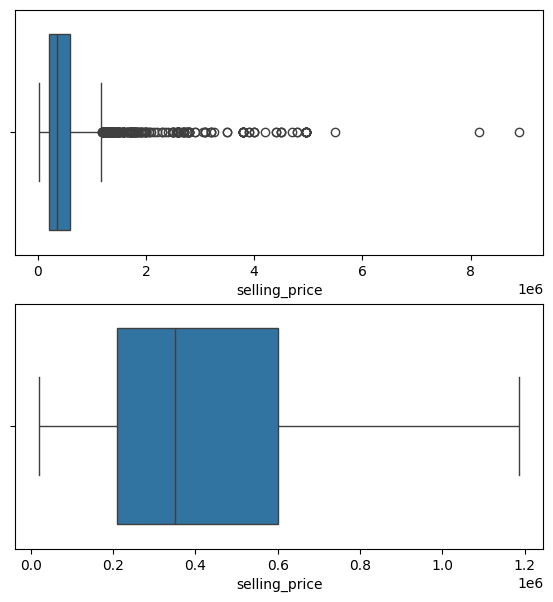

In [34]:
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df_before['selling_price'])


plt.subplot(224)
sns.boxplot(x=df['selling_price'])

plt.show()


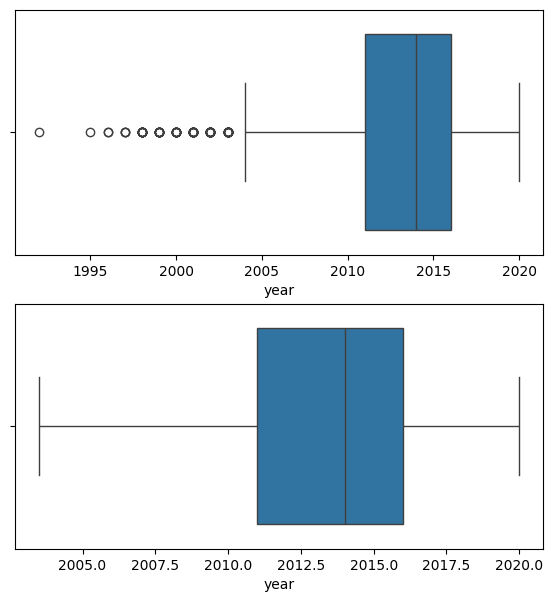

In [36]:
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df_before['year'])


plt.subplot(224)
sns.boxplot(x=df['year'])

plt.show()


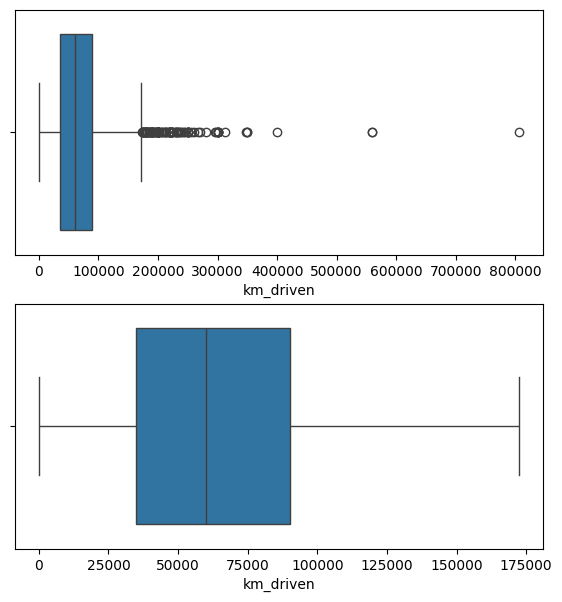

In [37]:
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df_before['km_driven'])


plt.subplot(224)
sns.boxplot(x=df['km_driven'])

plt.show()

In [38]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,2003.5,50000.0,100000.0,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,2003.5,95000.0,100000.0,Petrol,Individual,Manual,Second Owner


In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe=OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [42]:
ohe.fit_transform(df[['name','fuel','seller_type','transmission','owner']])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4340, 1501), dtype=int32)

In [44]:
a=pd.get_dummies(df,columns=['name','fuel','seller_type','transmission','owner'],drop_first=True)

In [45]:
a=a.astype(int)

In [46]:
a

,year,selling_price,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2003,50000,100000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
1,2003,95000,100000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
2,2003,250000,35000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2003,200000,60000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,2003,150000,120000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2020,1050000,1100,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4336,2020,545000,5000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4337,2020,530000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4338,2020,426000,1000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x=a.drop(columns='year')
y=a['year']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc=StandardScaler()

In [52]:
x_train_sc=sc.fit_transform(x_train)

In [53]:
df_new=pd.DataFrame(x_train_sc,columns=x_train.columns)

In [54]:
np.round(df_new.describe(),2)

,selling_price,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,name_Audi A4 35 TDI Premium,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,3472.00,3472.00,3472.00,3472.0,3472.0,3472.00,3472.00,3472.00,3472.00,3472.00,...,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00
mean,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.38,-1.63,-0.02,0.0,0.0,-0.02,-0.02,-0.05,-0.02,-0.02,...,-0.02,-0.08,-0.97,-1.71,-0.15,-3.00,-0.14,-0.58,-0.06,-0.27
25%,-0.76,-0.75,-0.02,0.0,0.0,-0.02,-0.02,-0.05,-0.02,-0.02,...,-0.02,-0.08,-0.97,-1.71,-0.15,0.33,-0.14,-0.58,-0.06,-0.27
50%,-0.27,-0.13,-0.02,0.0,0.0,-0.02,-0.02,-0.05,-0.02,-0.02,...,-0.02,-0.08,-0.97,0.58,-0.15,0.33,-0.14,-0.58,-0.06,-0.27
75%,0.51,0.62,-0.02,0.0,0.0,-0.02,-0.02,-0.05,-0.02,-0.02,...,-0.02,-0.08,1.03,0.58,-0.15,0.33,-0.14,1.71,-0.06,-0.27
max,2.43,2.68,58.92,0.0,0.0,58.92,58.92,18.61,41.65,58.92,...,58.92,13.14,1.03,0.58,6.47,0.33,7.36,1.71,17.74,3.68


In [55]:
# question-2

In [ ]:
df=pd.read_csv("C:\\Users\\HARSHITA\\Downloads\\credit_scoring - credit_scoring.csv")
df.head(2)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan


In [ ]:
numerical_columns=df.select_dtypes(exclude=['object'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
x=df.drop(columns=['Type of Loan'])
y=df['Type of Loan']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Label Encoding

In [ ]:
le=LabelEncoder()

In [ ]:
x_train['Gender']=le.fit_transform(x_train['Gender'])
x_train['Marital Status']=le.fit_transform(x_train['Marital Status'])
x_train['Education Level']=le.fit_transform(x_train['Education Level'])
x_train['Employment Status']=le.fit_transform(x_train['Employment Status'])

In [ ]:
#Ordinal Encoding

In [ ]:
oe=OrdinalEncoder(categories=[['Male','Female'],['Married', 'Single', 'Divorced'],['Master', 'High School', 'PhD', 'Bachelor'],
                             ['Employed', 'Unemployed', 'Self-Employed']])

In [ ]:
ordinal_transformed=oe.fit_transform(x_train[['Gender','Marital Status','Education Level','Employment Status']])

In [ ]:
df_1=pd.DataFrame(ordinal_transformed,columns=['Gender','Marital Status','Education Level','Employment Status'])

In [ ]:
df_new=pd.concat((df_1,numerical_columns),axis=1)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
log_transformer=FunctionTransformer(np.log1p)

In [ ]:
transformed_df=log_transformer.transform(df_new)

In [ ]:
transformed_df.head()

,Gender,Marital Status,Education Level,Employment Status,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
0,0.693147,0.000000,1.098612,0.693147,4.110874,0.198851,7.895808,1.098612,15.357740,1.294727,3.891820
1,0.000000,0.000000,1.386294,0.693147,3.258097,0.182322,7.771489,2.302585,15.101709,1.822935,4.110874
2,0.000000,1.098612,1.386294,1.098612,3.433987,0.198851,7.927324,1.945910,13.771560,1.324419,2.564949
3,0.693147,0.000000,0.693147,1.098612,4.077537,0.113329,7.224025,1.098612,15.369647,2.024193,4.110874
4,0.693147,0.693147,1.386294,1.098612,3.496508,0.688135,6.720220,1.098612,15.006094,1.985131,3.610918
